In [16]:
# Didit Adytia (adytia@telkomuniversity.ac.id)
# Source: https://towardsdatascience.com/master-machine-learning-simple-linear-regression-from-scratch-with-python-1526487c5964
# version 2021-03-02
# SIMPLE LINEAR REGRESSION - Modified version

In [17]:
# Setup setting terkait dengan plotting
import numpy as np                 # import numpy (mathematical operation)
import matplotlib.pyplot as plt    # import package untuk plotting
from matplotlib import rcParams    # runtime configuration (rc)
rcParams['figure.figsize']    = (14,7)   # untuk membuat visualisasi lebih baik, modif parameter dibawah ini
rcParams['axes.spines.top']   = False
rcParams['axes.spines.right'] = False

In [18]:
# mendefinisikan SIMPLE LINEAR REGRESSION
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None     # b0 dan b1 adalah variabel bebas dari garis yg kita cari

    def fit(self, X, y):   # ini tahapan untuk "training"
        ''' 
        Use calculus to calculate SLOPE and intercept Coefficients: y = b0 + b1x

        :param X: array, single feature
        :param y: array, true values
        :return: None    
        '''
        numerator   = np.sum( (X - np.mean(X))*(y - np.mean(y)) ) # formula pembilang
        denominator = np.sum((X - np.mean(X))**2 )                # formula pembagi
        self.b1     = numerator/denominator                       # lihat expresi ini dipenjelasan web nya
        self.b0     = np.mean(y) - self.b1*np.mean(X)              

    def predict(self, X): # untuk menghitung prediksi nilai y dengan input X
        '''
        Make predictions using the simple line equation
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X,y)` before making predictions.')
        return self.b0 + self.b1*X

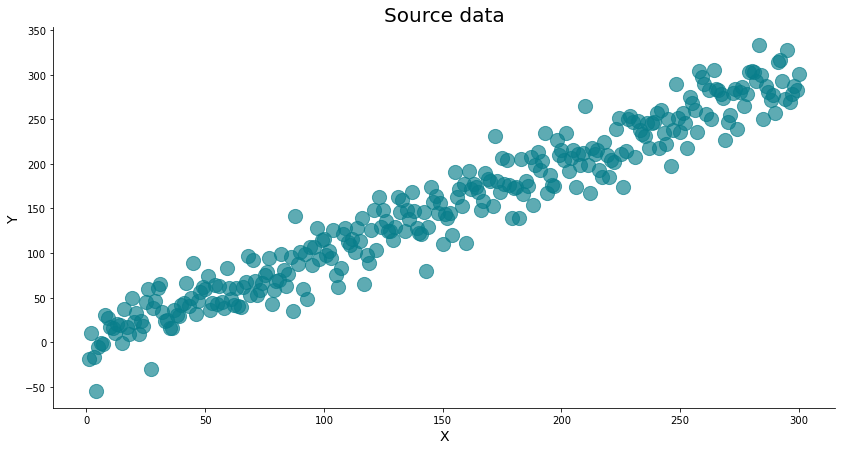

In [19]:
# Now we creating dummy data:
X = np.arange(start=1, stop=301)        # X contains a list of numbers between 1 and 300 (1, 2, 3, ..., 299, 300)
y = np.random.normal(loc=X, scale=20)   # y contains normally distributed values centered around X with standard deviation of 20 =20)

# plotting data
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65) # s=ukuranMarker, c=color, alpha=transparency
plt.title('Source data', size=20)                 # size= ukuran font
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [20]:
# for validation, we split between training data and testing data
# use sklearn package
from sklearn.model_selection import train_test_split

# test = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Training testing process:
model     = SimpleLinearRegression()    # inialization process
model.fit(X_train, y_train)             # training process, output: coef b0 & b1
preds     = model.predict(X_test)       # prediction process, input: X_test, ouput: y_prediction

In [21]:
# menampilkan coef hasil training: b0 and b1
model.b0, model.b1

(-0.5360157908164354, 1.0083648729215284)

In [23]:
# menampilkan prediction
preds

array([205.17041829, 268.69740528, 153.74380977,   9.54763294,
       235.42136447, 228.36281036, 198.11186417, 110.38412023,
         5.51417345, 176.93620184, 239.45482396,  57.94914684,
       220.29589138,  45.84876836, 183.99475595, 223.320986  ,
       291.88979736, 213.23733727, 149.71035027, 166.85255311,
        79.12480917, 114.41757972, 251.55520244, 252.56356731,
       105.34229587,  42.82367374, 283.82287837, 297.93998659,
       158.78563413, 240.46318884,  17.61455192, 165.84418824,
        33.74838989,  24.67310603, 217.27079676, 120.46776896,
         7.53090319,  91.22518765,  46.85713324,  74.08298481,
        94.25028226,  77.10807942, 288.86470274,  60.97424146,
        78.1164443 ,  63.99933608, 236.42972935, 231.38790498,
       112.40084998, 233.40463473, 181.97802621, 145.67689078,
       241.47155371,  76.09971455, 299.95671634, 280.79778375,
        98.28374176,  93.24191739, 194.07840468,  25.68147091])

In [24]:
# menampilkan y_test (data untuk di compare dengan prediction)
y_test

array([207.06175951, 278.38982441, 145.00793873,  17.14957303,
       233.53627964, 214.70501698, 175.17339   , 112.79675502,
        -0.55277554, 177.13082529, 245.51365857,  38.48425349,
       210.18440075,  31.38619467, 205.69902079, 201.77525395,
       257.38360011, 167.19194995, 155.94856888, 147.95376885,
        58.58794962, 128.56988335, 235.4376272 , 257.34675111,
        75.34901669,  40.36091544, 293.03074076, 269.97544785,
       152.4068654 , 247.01182292,   9.49188541, 168.46870163,
        25.0652435 ,  44.83884626, 193.2735936 , 126.415986  ,
        30.73082004,  59.17723468,  45.82074626,  66.26222504,
       106.56642288,  94.87872302, 280.39572225,  48.893323  ,
        42.59839298,  40.84117678, 231.42094525, 247.50787255,
       115.7500336 , 247.67977495, 173.72090065, 173.84286253,
       257.41798614,  78.19856342, 287.97383001, 302.96849099,
        93.62963566,  48.58477372, 234.66075346,  59.39600427])

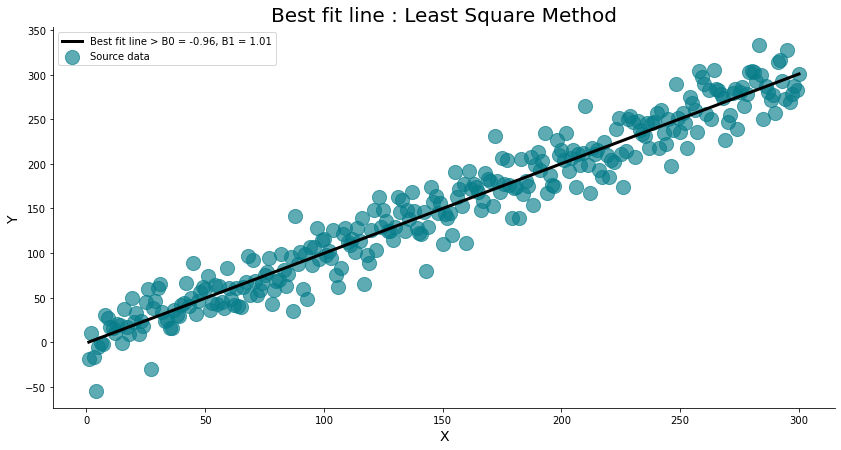

In [25]:
# VALIDATION ? 
# 1. Qualitatively --> visualization
# 2. Quantitative  --> RMSE, MAE, etc

# 1. QUALITATIVE
# Visualize the data, by using best fit line
model_all = SimpleLinearRegression()
model_all.fit(X,y)                       # bangun kembali model dengan semua data
preds_all = model_all.predict(X)         # membangun model prediksi

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line : Least Square Method', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # menunjukkan label
plt.show()

In [26]:
# 2. QUANTITATIVE Comparison 
# now we will validate the predicted value with testing data using RMSE
from sklearn.metrics import mean_squared_error  # import rmse from sklearn
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))   # definisikan y sbg variable?
rmse(y_test, preds)

18.908554175640692

In [11]:
# Now we will compare with SCIKIT-LEARN: LinearRegression
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()                               # initialization
sk_model.fit(np.array(X_train).reshape(-1,1), y_train)      # training the model
sk_preds = sk_model.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

sk_model.intercept_, sk_model.coef_     # show the output: b0 and b1 from the prediction

(-1.2629663267869375, array([1.01965306]))

In [12]:
# hitung akurasi melalui RMSE untuk hasil dari SCIKIT-LEARN:
rmse(y_test, sk_preds)
# hasil nya hampir sama dengan perhitungan di atas.

19.99249854042666

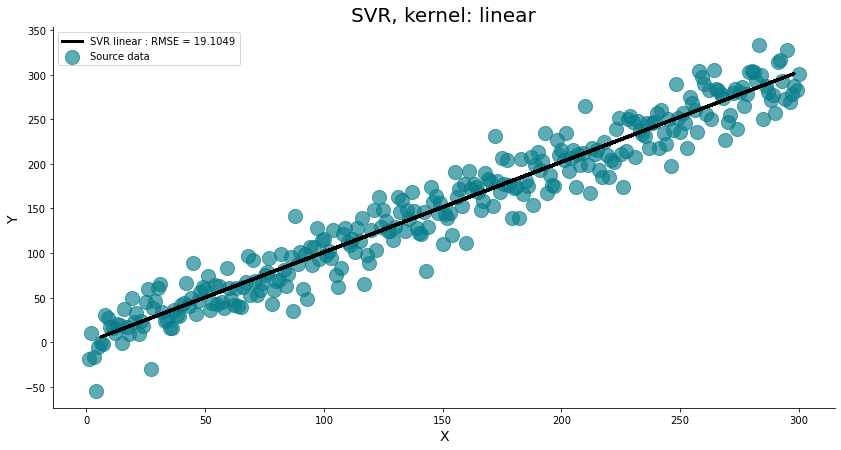

In [27]:
# Now we will playing with parameters in SVR - LINEAR
from sklearn.svm import SVR

# now we use linear kernel
svr_lin = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1) # SVR setting
svr_lin.fit(np.array(X_train).reshape(-1,1), y_train)        # training the model
svr_lin_preds = svr_lin.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse_svrlin = rmse(y_test, svr_lin_preds)

# PLOTTING
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X_test, svr_lin_preds, color='#000000', lw=3, label=f'SVR linear : RMSE = {rmse_svrlin:.4f}')
plt.title('SVR, kernel: linear', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # menunjukkan label
plt.show()


In [28]:
# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse(y_test, svr_lin_preds)

19.104868691461466